In [371]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from performance_metrics import performance_metrics
from sklearn.model_selection import train_test_split
import numpy as np
import random

In [372]:
data=pd.read_csv('data.txt', sep='\t', index_col=-1)
data.index=pd.to_datetime(data.index)
target_variables = data['tws_csr_interp_lag0']
predictor_variables = data.drop(['tws_csr_interp_lag0'], axis=1)
X = predictor_variables
y = target_variables;
train_size = 0.6
train_index = int(len(data) * train_size)
X_train = np.array(X.iloc[:train_index])
y_train = np.array(y.iloc[:train_index])
X_test = np.array(X.iloc[train_index:])
y_test = np.array(y.iloc[train_index:])

In [373]:
seed_value= 82
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model = keras.Sequential([tf.keras.layers.Input(shape=(6,)), tf.keras.layers.Dense(32, activation='relu'), tf.keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
4/4 [==============================] - 1s 5ms/step - loss: 1555.7871
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 891.0399
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 466.7892
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 250.0938
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 178.1954
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 200.2624
Epoch 7/30
4/4 [==============================] - 0s 4ms/step - loss: 229.2654
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 238.9341
Epoch 9/30
4/4 [==============================] - 0s 5ms/step - loss: 216.4717
Epoch 10/30
4/4 [==============================] - 0s 4ms/step - loss: 179.0976
Epoch 11/30
4/4 [==============================] - 0s 5ms/step - loss: 146.2645
Epoch 12/30
4/4 [==============================] - 0s 3ms/step - loss: 125.0175
Epoch 13/30
4/4 [==============================]

In [374]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

3/3 [==============================] - 0s 5ms/step - loss: 22.6594
Test Loss: 22.6594


In [375]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [376]:
custom_y_pred = []
for i in range(len(predictions)):
  custom_y_pred.append(predictions[i][0])
custom_y_pred = np.array(custom_y_pred)

In [377]:
metrics_dict = performance_metrics(y_test, custom_y_pred)

{
    "RMSE": 4.76,
    "NRMSE": 0.72,
    "NSE": 0.47,
    "KGE": -4.22,
    "R-squared": 0.47
}


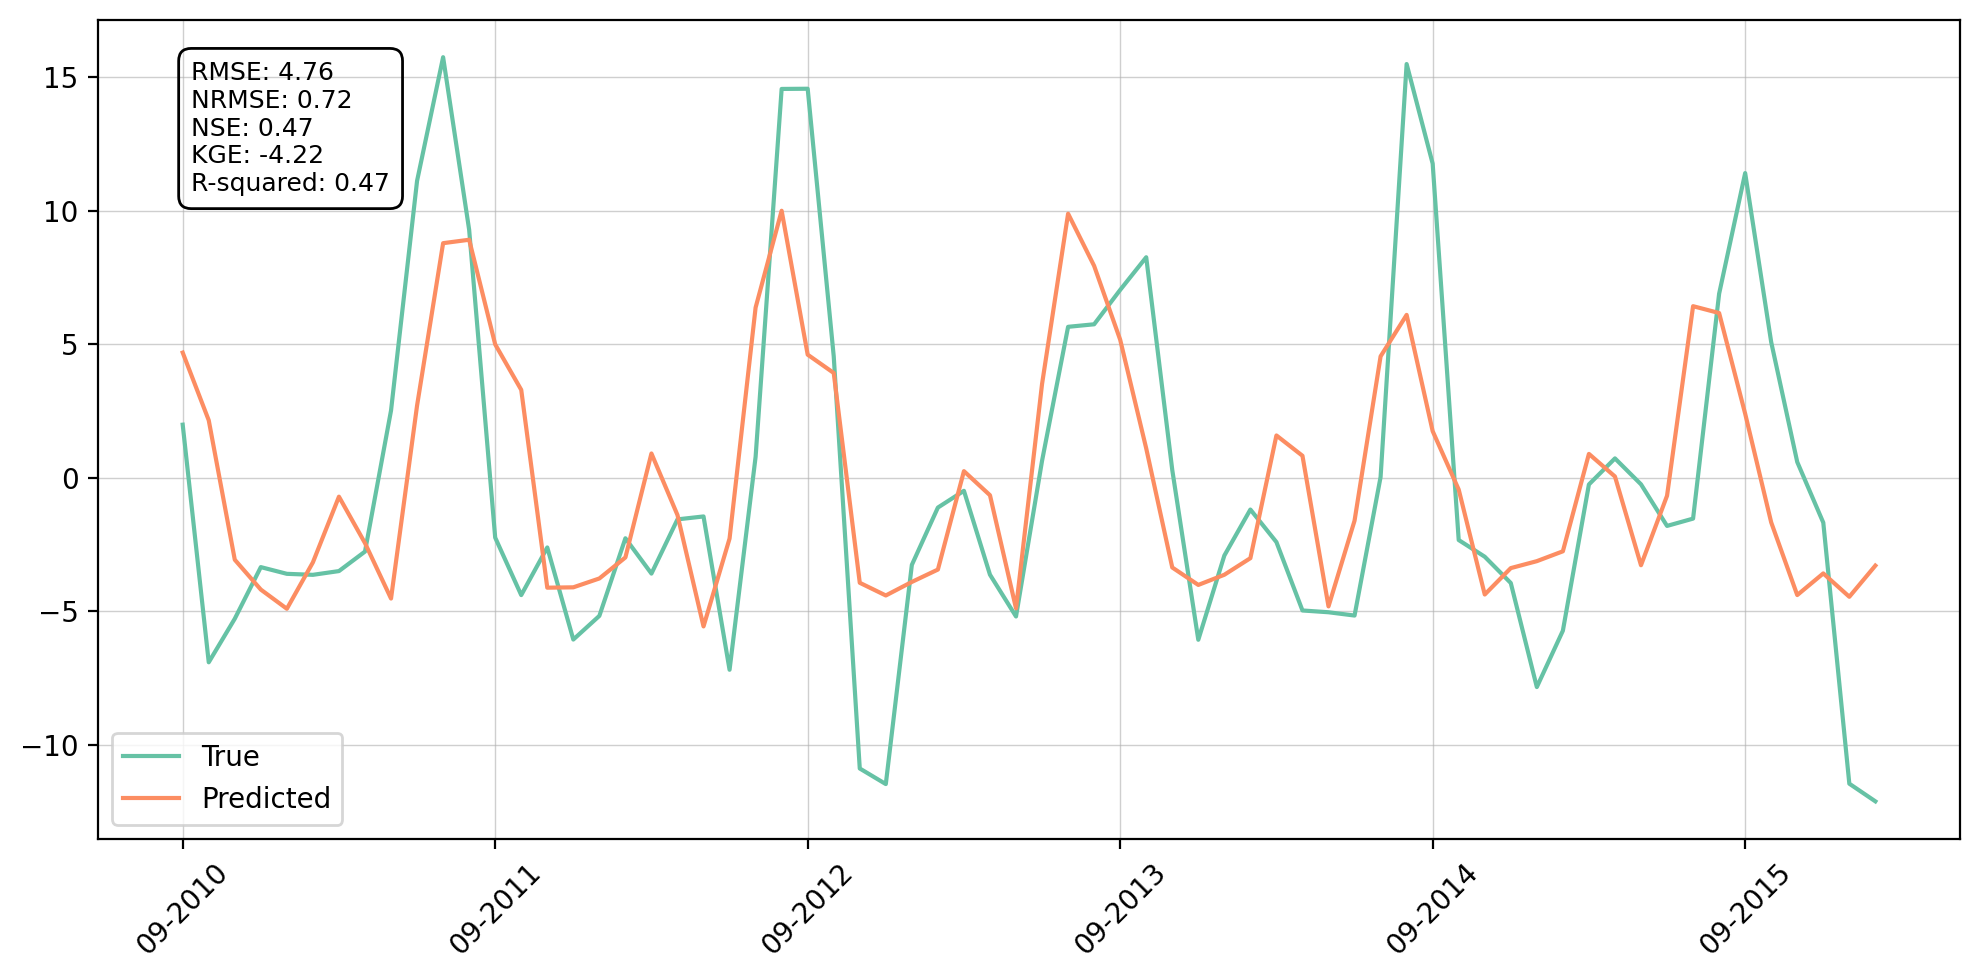

In [378]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.plot(y_test, color='#66c2a5', label='True')
ax.plot(predictions, color='#fc8d62', label='Predicted')
textbox = '\n'.join([f'{key}: {value}' for key, value in metrics_dict.items()])
ax.text(0.05, 0.95, textbox, transform=ax.transAxes, fontsize=9,
        verticalalignment='top',
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
xticks = data.index[train_index:]
xticks = [date.strftime('%m-%Y') for date in xticks]
ax.set_xticks(range(0, len(xticks), 12))
ax.set_xticklabels(xticks[::12], rotation=45)
plt.grid(True, alpha=0.6, lw=0.5)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()